# Generate fake human data

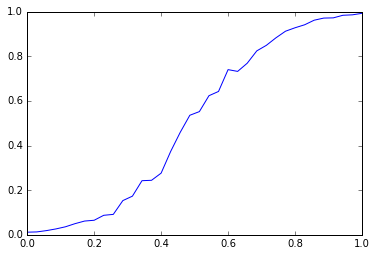

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)

x = np.linspace(0, 1, 36)[None, :] * np.ones((50, 36))
y = 1.0 / (1 + np.exp(-10 * (x + np.random.normal(0, 0.1, (50, 36)) - 0.5)))
plt.plot(x[0], y.mean(axis=0))

t = np.empty((50, 36))
rt = np.empty((50, 36))
rt_means = np.random.uniform(200, 1000, 36)
rt_stds = np.sqrt(np.random.uniform(100, 250, 50))
for i in range(50):
    for j in range(36):
        t[i, j] = time.time()
        rt[i, j] = np.random.normal(rt_means[j], rt_stds[i])
        
data = []
for i in range(50):
    trials = np.arange(0, 36)
    np.random.shuffle(trials)
    for j in range(36):
        data.append({
            "participant": int(i),
            "stimulus": int(j),
            "trial": int(trials[j]),
            "timestamp": float(t[i, j]),
            "x": float(x[i, j]),
            "y": float(y[i, j]),
            "rt": float(rt[i, j])
        })
        
import json
with open("data/human_raw.json", "w") as fh:
    json.dump(data, fh, indent=1)

In [2]:
!head -n 20 data/human_raw.json

[
 {
  "stimulus": 0,
  "rt": 712.3117048408211,
  "timestamp": 1468341476.981191,
  "x": 0.0,
  "trial": 33,
  "y": 0.033065042123708886,
  "participant": 0
 },
 {
  "stimulus": 1,
  "rt": 494.589488145245,
  "timestamp": 1468341476.9812,
  "x": 0.02857142857142857,
  "trial": 4,
  "y": 0.004839743185043226,
  "participant": 0
 },
 {


# Generate fake model data

In [3]:
model = (x[0] / 2) + 0.25 + np.random.normal(0, 0.01, 36)
np.savez("data/model_raw.npz", x=x[0], y=model)